# XGBoost 分类

In [ ]:
import xgboost as xgb

xgb_param = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'tree_method': 'hist',
    'max_depth': 5, 
    'eta': 0.1,
    'n_estimators': 8,
    'num_parallel_tree': 100,
    'min_child_weight': 3,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'alpha': 1,
    'lambda': 1,
    'gamma': 0.0001,
    'seed': 314,
    'missing': -999.0
}

xgb_model = xgb.train( 
    params=xgb_param, 
    dtrain=train_xgb_dm,
    num_boost_round=8,
    evals=[(valid_xgb_dm, 'train')],
    early_stopping_rounds=10,
    verbose_eval=True
)

# XGboost + LR

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
X, y = iris.data,iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=76)
X_train_xgb, X_train_lr, y_train_xgb, y_train_lr = train_test_split(X_train, y_train, test_size=0.75, random_state=76)

In [3]:
train_xgb_dm = xgb.DMatrix(data=X_train_xgb, label=y_train_xgb, nthread=8)
valid_xgb_dm = xgb.DMatrix(data=X_test, label=y_test)

In [17]:
import xgboost as xgb

xgb_param = {
    'objective': 'multi:softmax',
    'num_class': 2,
    'tree_method': 'gpu_hist',
    'gpu_id': 0,
    'max_depth': 5, 
    'eta': 0.1,
    'n_estimators': 8,
    'num_parallel_tree': 100,
    'min_child_weight': 3,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'alpha': 1,
    'lambda': 1,
    'gamma': 0.0001,
    'seed': 314,
    'missing': -999.0
}

xgb_model = xgb.train( 
    params=xgb_param, 
    dtrain=train_xgb_dm,
    num_boost_round=8000,
    evals=[(valid_xgb_dm, 'train')],
    early_stopping_rounds=10,
    verbose_eval=True
)

[21:15:06] WARNING: /croot/xgboost-split_1675457761144/work/src/learner.cc:767: 
Parameters: { "missing", "n_estimators" } are not used.

[0]	train-mlogloss:1.30853
[1]	train-mlogloss:1.24011
[2]	train-mlogloss:1.17809
[3]	train-mlogloss:1.12247
[4]	train-mlogloss:1.07218
[5]	train-mlogloss:1.02825
[6]	train-mlogloss:0.98755
[7]	train-mlogloss:0.95037


In [10]:
xgb_model.save_model(fname='../mold/xgb_multi_logistic.ubj')

In [29]:
xgb_model.predict(data=valid_xgb_dm)

array([0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.], dtype=float32)

In [ ]:
xgb_model._B

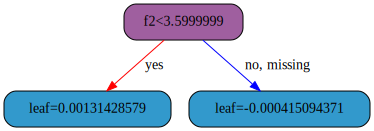

In [18]:
xgb.to_graphviz(
    xgb_model, 
    num_trees=0, 
    rankdir='TB', 
    condition_node_params={
        'shape':'box',
        'style':'filled,rounded',
        'fillcolor':'#9F5F9F'
    }, 
    leaf_node_params={
        'shape':'box',
        'style':'filled,rounded',
        'fillcolor':'#3299CC'
    }
)

In [80]:
xgb_model.save_model(fname='../mold/xgb_multi_logistic.ubj')

In [16]:
xgb_model.predict(valid_xgb_dm, output_margin=True)

array([[1.0160005 , 0.3828099 , 0.31774345, 0.23952346],
       [0.49204078, 0.73222244, 0.31911373, 0.23952346],
       [1.0165553 , 0.3828099 , 0.31774345, 0.23952346],
       [0.3290741 , 0.76615816, 0.6796873 , 0.23952346],
       [0.3290741 , 0.76615816, 0.6796873 , 0.23952346],
       [0.329927  , 0.7658787 , 0.47608837, 0.23952346],
       [1.0158755 , 0.385592  , 0.31814978, 0.23952346],
       [0.3290741 , 0.76833797, 0.6278692 , 0.23952346],
       [0.33792505, 0.7649123 , 0.43252197, 0.23952346],
       [0.3290741 , 0.76615816, 0.6796873 , 0.23952346],
       [0.91133124, 0.65397173, 0.3178929 , 0.23952346],
       [0.32975402, 0.7633761 , 0.67928094, 0.23952346],
       [0.33004335, 0.76905525, 0.40589303, 0.23952346],
       [0.32975402, 0.76377237, 0.6444724 , 0.23952346],
       [0.9011629 , 0.67296916, 0.31986645, 0.23952346],
       [1.0158755 , 0.385592  , 0.31814978, 0.23952346],
       [1.0165553 , 0.3828099 , 0.31774345, 0.23952346],
       [0.32975402, 0.7633761 ,

In [22]:
leaf_index = xgb_model.predict(valid_xgb_dm, pred_leaf=True)

In [30]:
one_hot = OneHotEncoder()
one_hot.fit(leaf_index)
one_hot_array = one_hot.transform(leaf_index).toarray()

In [42]:
X_train_lr_stack = np.hstack([X_test, one_hot_array])

In [47]:

lr = LogisticRegression(
    class_weight= "balanced",
    penalty='l2',
    dual=False, 
    tol=0.001,
    C=0.001, 
    # fit_intercept=True, 
    # intercept_scaling=1, 
    # random_state=None, 
    # solver='liblinear',   # newton-cg, lbfgs, liblinear, sag, saga}, default: liblinear.
    # max_iter=100, 
    # multi_class='ovr',  # ovr, multinomial, auto
    # verbose=0, 
    # warm_start=False, 
    # n_jobs=None
)

lr_model = lr.fit(X_train_lr_stack, y_test)

In [50]:
#y_predict = lr_model.predict_proba(ohe.transform(xgb.apply(X_test)))
lr_model.predict(X=X_test_stack)

array([0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 2, 0,
       0])

0.5